In [1]:
import pandas as pd
import numpy as np
from __future__ import division
import calendar
import time
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from dateutil.parser import parse
from pandas.tslib import Timestamp
colorz=sns.color_palette("husl", 8)
#sns.palplot(sns.color_palette("husl", 8))

In [2]:
aqi=pd.read_csv('/Users/stella/Desktop//realeco_sn0135-ldsa_2017-05-11t153332_2017-05-18t153332.csv',delimiter=';',skiprows=0)

OSError: File b'/Users/stella/Downloads/realeco_sn0135-ldsa_2017-05-11t153332_2017-05-18t153332.csv' does not exist

In [ ]:
aqu=pd.read_csv('/Users/stella/Downloads/1329_PEGASOR A_20170518154814.csv',delimiter=',',skiprows=3)

In [260]:
aqu=aqu.reset_index()
aqu.columns=aqu.iloc[0]
aqu=aqu.iloc[1:].reset_index()

In [261]:
del aqu['index']

In [262]:
aqu.tail()

,DateTime,MEASURE_PA_LABEL,MEASURE_PA_LABEL,MEASURE_PA_LABEL,nan
2872,5/18/2017 10:40,53.761,0.000,59.478,NaN
2873,5/18/2017 10:41,53.761,0.000,59.478,NaN
2874,5/18/2017 10:42,56.114,0.000,62.388,NaN
2875,5/18/2017 10:43,56.114,0.000,62.388,NaN
2876,5/18/2017 10:44,56.114,0.000,62.227,NaN


In [263]:
aqu=aqu.dropna(axis=1)
aqu.columns=['DateTime','ldsa1','ldsa2','ldsa3']

In [264]:
aqu.tail()

,DateTime,ldsa1,ldsa2,ldsa3
2872,5/18/2017 10:40,53.761,0.000,59.478
2873,5/18/2017 10:41,53.761,0.000,59.478
2874,5/18/2017 10:42,56.114,0.000,62.388
2875,5/18/2017 10:43,56.114,0.000,62.388
2876,5/18/2017 10:44,56.114,0.000,62.227


In [265]:
aqu['DateTime']=aqu['DateTime'].apply(lambda x: parse(x))

In [266]:
aqi['time']=aqi['time'].apply(lambda x: parse(x))

In [267]:
aqi['time']=aqi['time']-datetime.timedelta(hours=4)
#print(aqi['time'][len(aqi)-1]-datetime.timedelta(hours=4))

In [268]:
aqu=aqu.set_index('DateTime')
aqi=aqi.set_index('time')

In [273]:
len(aqi),len(aqu)

(10077, 2877)

In [275]:
df=aqi.join(aqu).dropna()

In [276]:
df=df.astype(float)

In [277]:
#df[df['ldsa2']==0]
#& (df['ldsa2']==0) & (df['ldsa3']==0)]

In [278]:
df=df.reset_index()

In [280]:
del df['ldsa2']

In [331]:
df.loc(start)

In [346]:
list(df['index']).index(list(df['index'][df['index']>=datetime.datetime(2017,5,17,10)])[0])

1392

In [350]:
list(df['index']).index(list(df['index'][df['index']>=datetime.datetime(2017,5,17,19)])[0])

1922

In [370]:
start=list(df['index']).index(list(df['index'][df['index']>=datetime.datetime(2017,5,17,12)])[0])
end=list(df['index']).index(list(df['index'][df['index']>=datetime.datetime(2017,5,17,18,35)])[0])

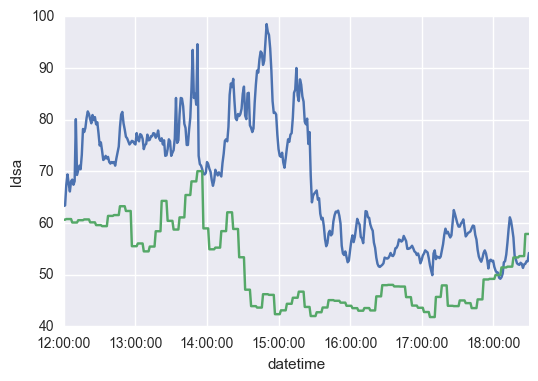

In [374]:
plt.plot(df['index'][start:end],df['value'][start:end])
plt.plot(df['index'][start:end],df['ldsa1'][start:end])
#plt.plot(df['index'],df['ldsa3'])
plt.xlabel('datetime')
plt.ylabel('ldsa')

In [375]:
df=df[(df['value']>0) & (df['ldsa1']>0) & (df['ldsa3']>0)]

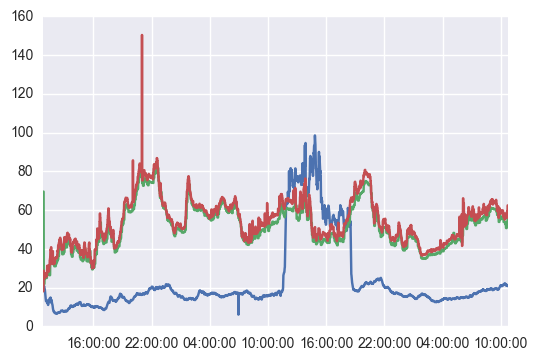

In [376]:
plt.plot(df['index'],df['value'])
plt.plot(df['index'],df['ldsa1'])
plt.plot(df['index'],df['ldsa3'])

In [378]:
df=aqu.copy(False).reset_index()

In [407]:
df['ldsa2']=df['ldsa2'].astype(float)
df['ldsa1']=df['ldsa1'].astype(float)
df['ldsa3']=df['ldsa3'].astype(float)

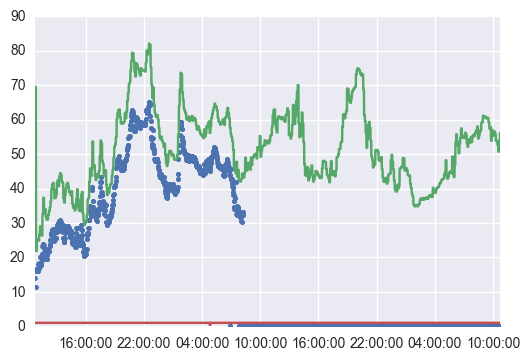

In [414]:
plt.plot(df['DateTime'],df['ldsa2'],'.')
plt.plot(df['DateTime'],df['ldsa1'])
plt.plot(df['DateTime'],df['ldsa3']>0)